## 绘制中国人口年龄分布图。

In [1]:
import xlrd
import pprint
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [ ]:
def ls(path='*'):
    import glob
    return glob.glob(path)

In [2]:
def fraw_peopledata(file, title):
    path = file
    data_people = xlrd.open_workbook(path)
    table = data_people.sheets()[0]
    age = table.col_values(0, start_rowx=8, end_rowx=28)
    male = table.col_values(5, 8, 28)
    female = table.col_values(6, 8, 28)
    # 男性数量朝左。
    for i in range(len(male)):
        male[i] = -male[i]
    plt.figure(figsize=(20,10))
    plt.barh(age, female, color='r', label='女性')
    plt.barh(age, male, color='b', label='男性')

    for i in range(len(female)):
        plt.text(female[i]+0.1, i-0.05, "%.2f%%" % female[i], fontdict={'size': 14, 'color':  'red'})
        plt.text(male[i]-0.45, i-0.1, "%.2f%% "% abs(male[i]), fontdict={'size': 14, 'color':  'blue'})

    # 显示范围
    plt.ylim(-2, 22)
    plt.xlim(-6, 6)

    plt.xlabel("性别（男/女）", fontsize=20)
    plt.ylabel("年龄组（岁）", fontsize=20)
    plt.title("%d年中国人口年龄性别组成" % title, fontsize=25)

    # 添加图例
    plt.legend(loc='upper right')

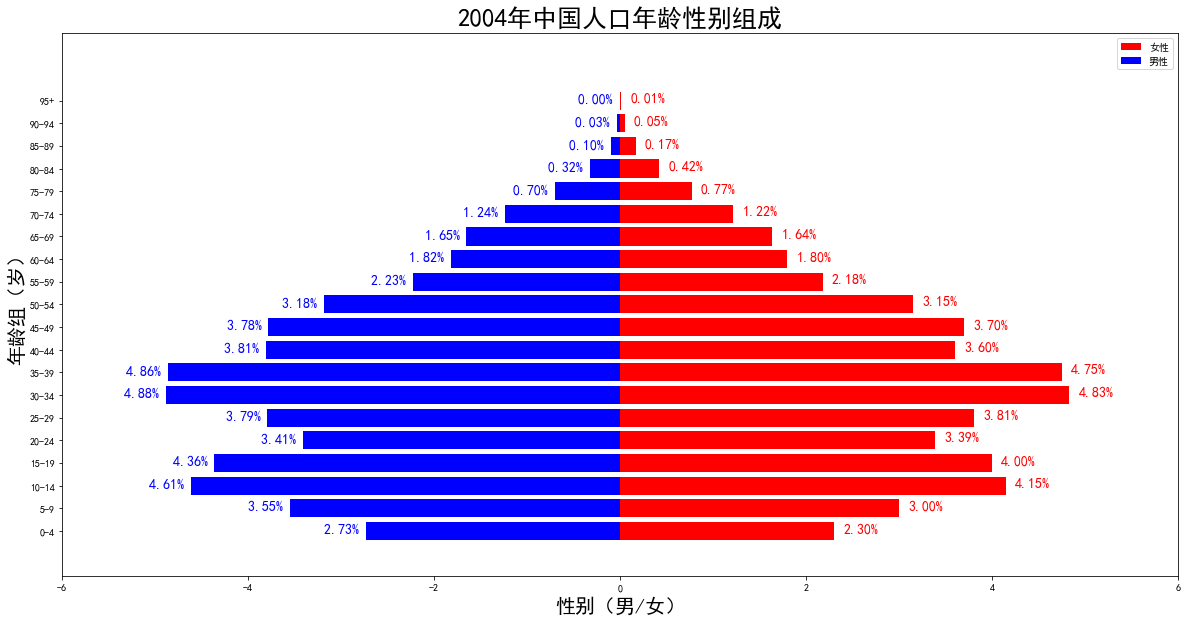

In [3]:
file = "./datas/国家统计局/按年龄和性别分人口数_2004.xls"
year = 2004
fraw_peopledata(file, year)

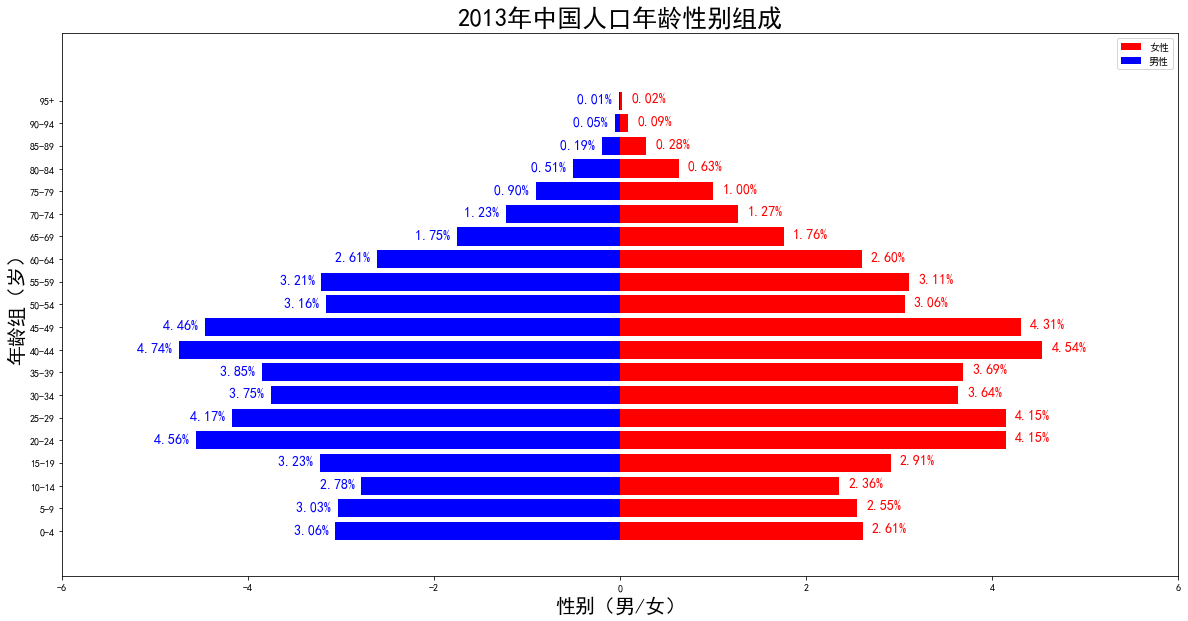

In [4]:
file = "./datas/国家统计局/按年龄和性别分人口数_2013.xls"
year = 2013
fraw_peopledata(file, year)

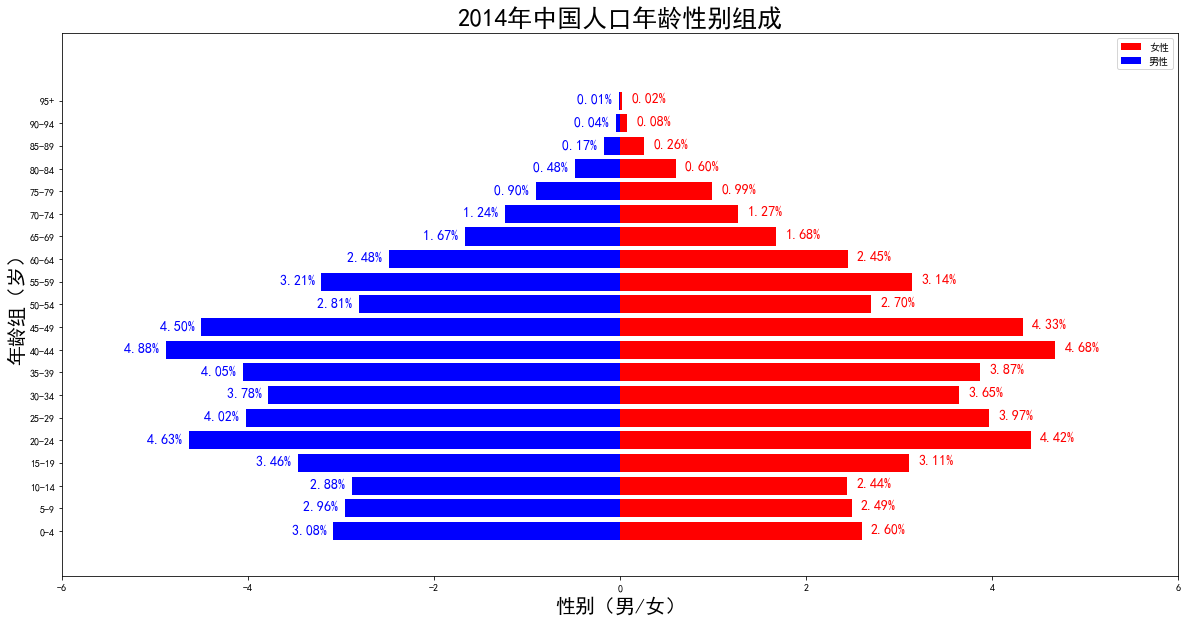

In [5]:
file = "./datas/国家统计局/按年龄和性别分人口数_2012.xls"
year = 2014
fraw_peopledata(file, year)

In [21]:
years = range(2004, 2014)

files = ls("./datas/国家统计局/*")

[None, None, None]

<Figure size 432x288 with 0 Axes>

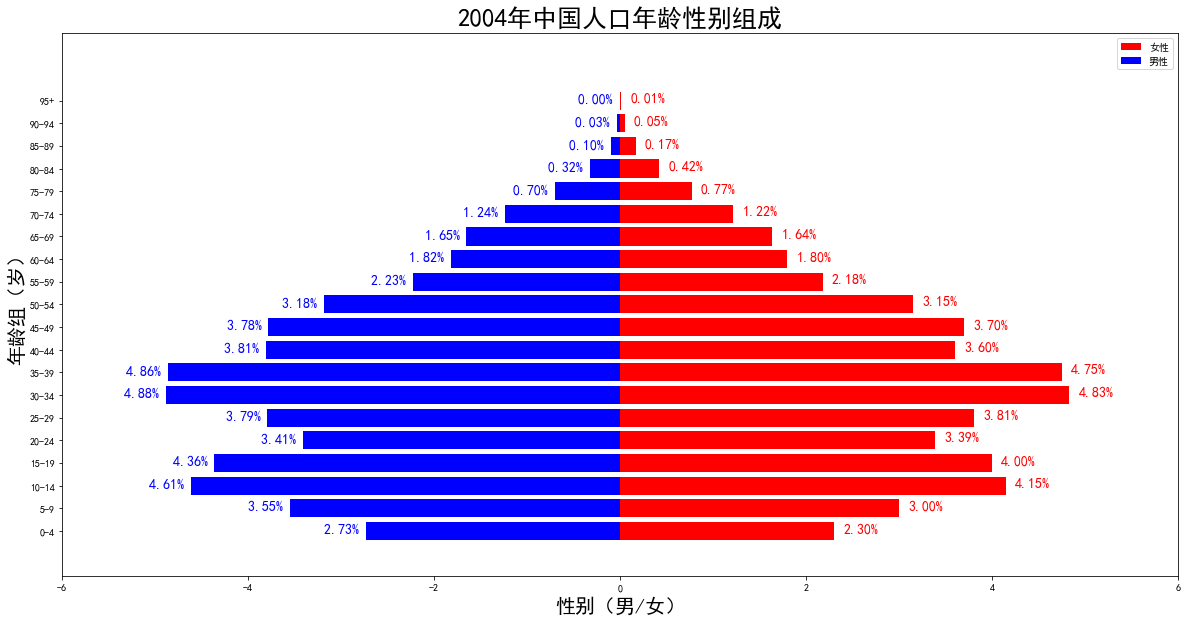

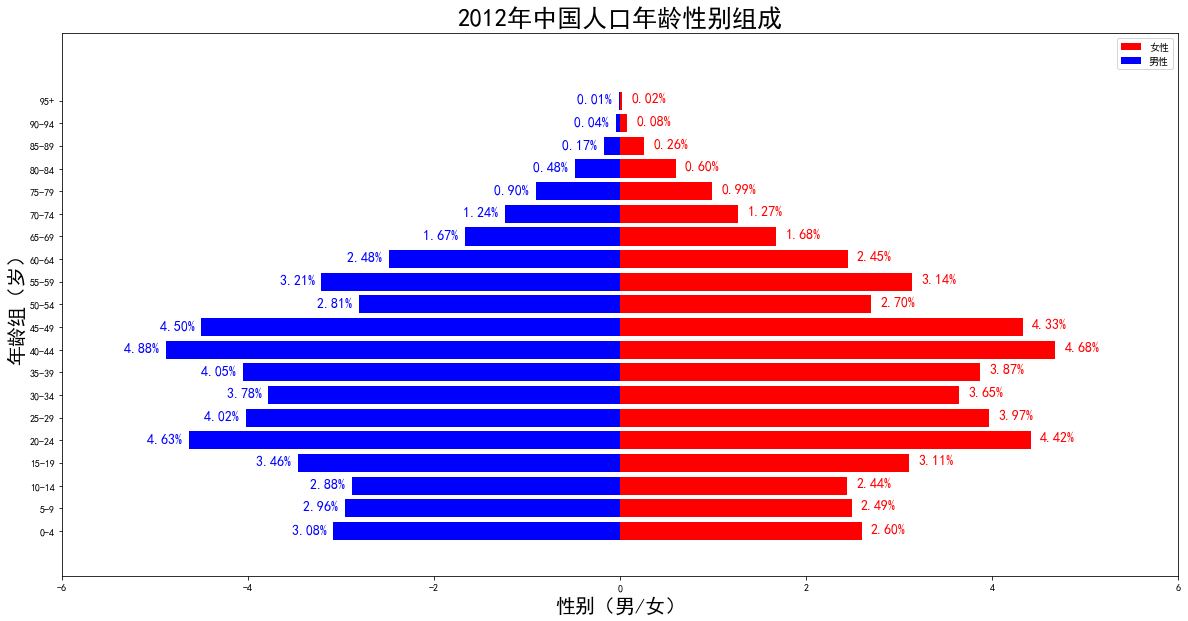

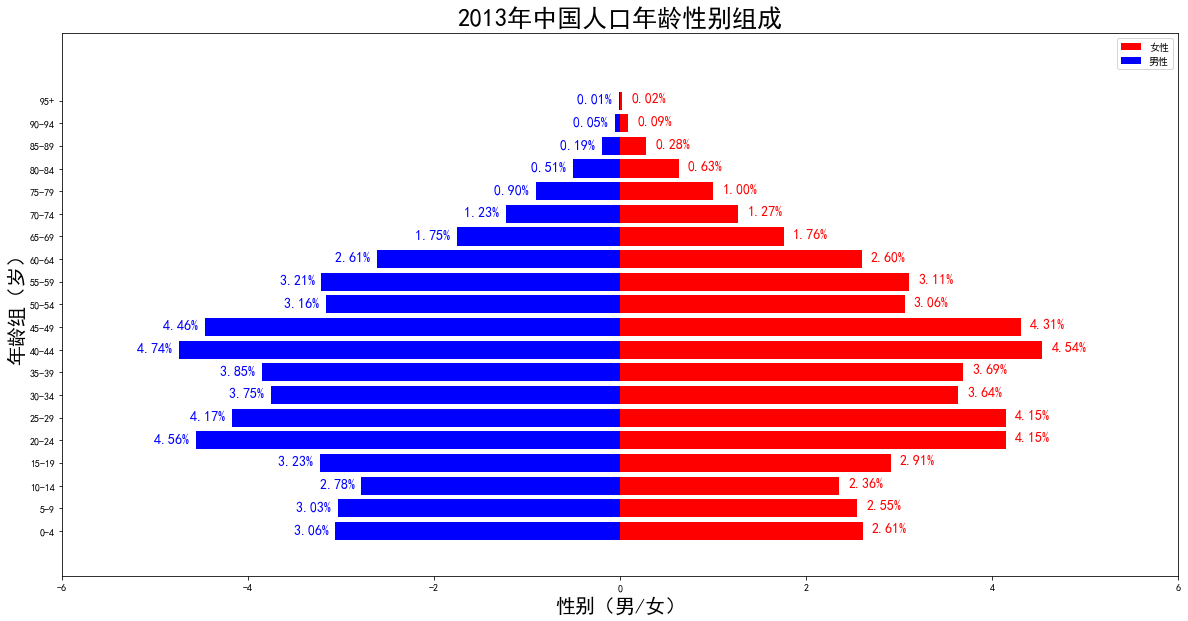

In [46]:
import matplotlib.animation as animation
ims = []
n = len(files)
fig = plt.figure()
for j in range(n):
    for i in years:
        if (str(i) in files[j]):            
            im = fraw_peopledata(files[j], i)
            ims.append(im)
#             print(i)
#             print(files[j])
# ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
# ani.save("test.gif",writer='pillow')
ims

<class 'NoneType'>
<class 'NoneType'>
<class 'NoneType'>


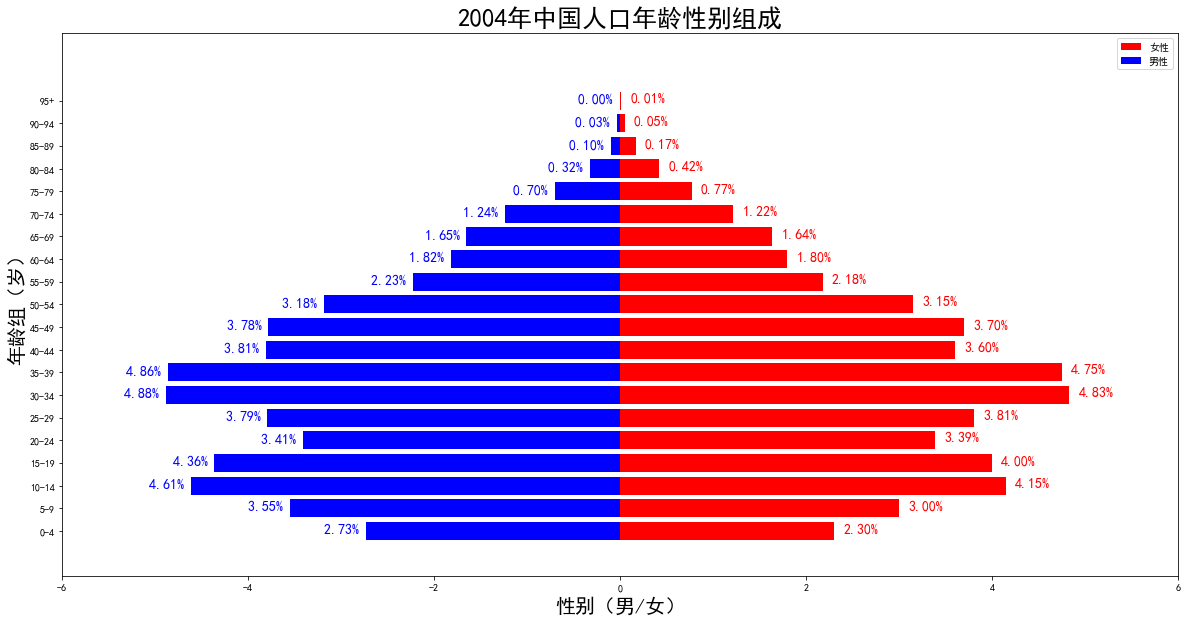

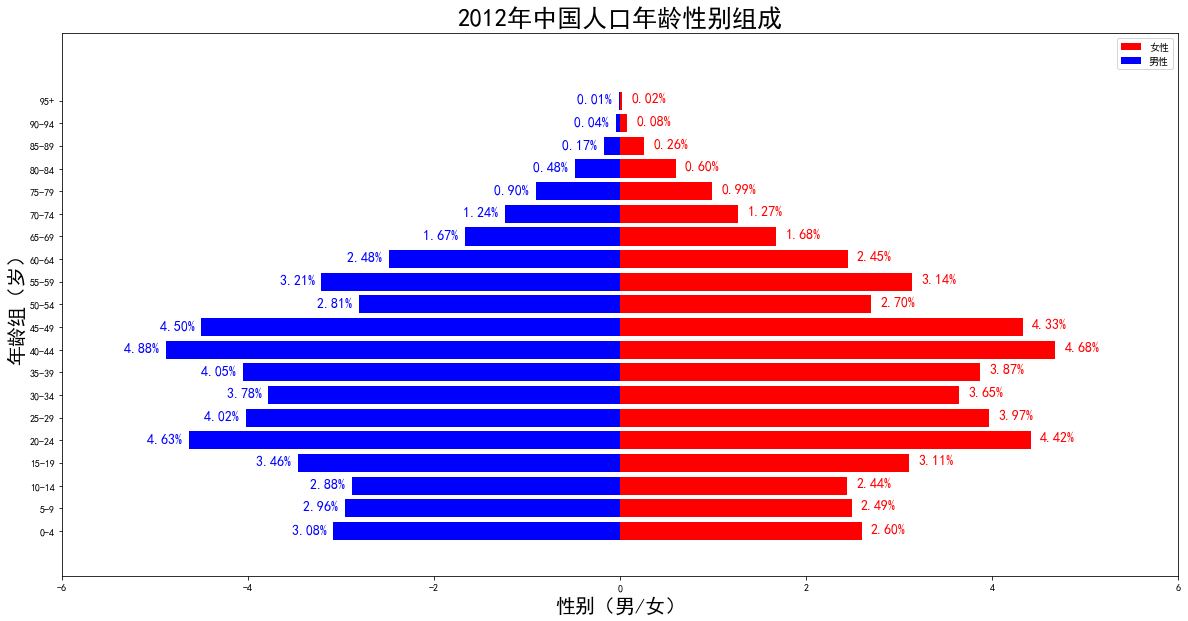

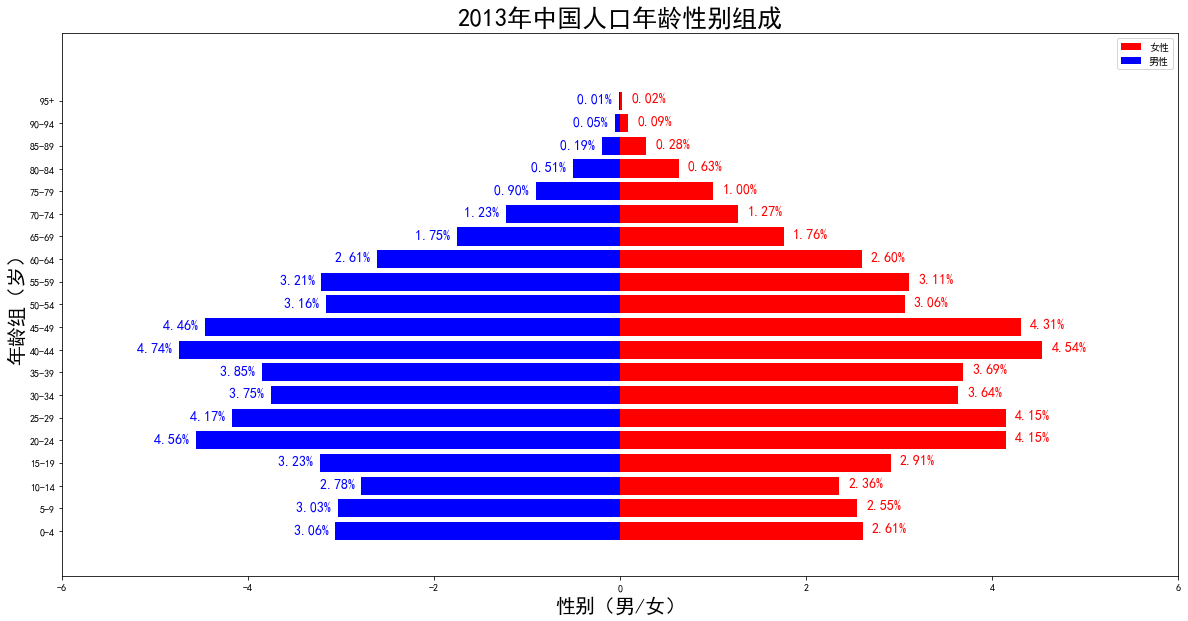

In [44]:
import matplotlib.animation as animation
ims = []
n = len(files)
# fig = plt.figure()
for j in range(n):
    for i in years:
        if (str(i) in files[j]):
            
            print(type(fraw_peopledata(files[j], i)))

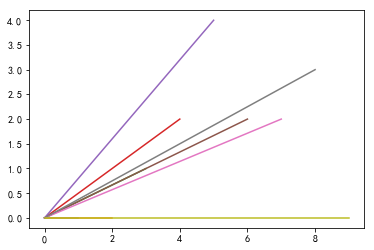

In [57]:
import seaborn
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
if __name__ == "__main__":
    fig = plt.figure()
    ims = []
    for i in range(1,10):
        im = plt.plot(np.linspace(0, i,10), np.linspace(0, np.random.randint(i),10))
        ims.append(im)
#     ani = animation.ArtistAnimation(fig, ims, interval=200, repeat_delay=1000)
#     ani.save("test.gif",writer='pillow')
    ims

In [53]:
type(ims[1][0])

matplotlib.lines.Line2D

MovieWriter pollow unavailable. Trying to use pillow instead.


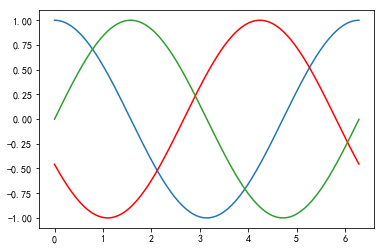

In [55]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

fig, ax = plt.subplots()

x = np.arange(0, 2 * np.pi, 0.01)
ax.plot(x, np.cos(x))

def init():
    return ax.plot(x, np.sin(x))

def animate(i):
    try:
        ax.lines.pop(1)
    except Exception:
        pass
    line = ax.plot(x, np.sin(x + i / 10.0), 'r')
    return line,


animation = animation.FuncAnimation(fig=fig, func=animate, frames=100, init_func=init, interval=20, blit=False)
animation.save('redraw.gif', writer='pollow')
plt.show()


In [56]:
type(fig)

matplotlib.figure.Figure